In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df=pd.read_csv('train_loan.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

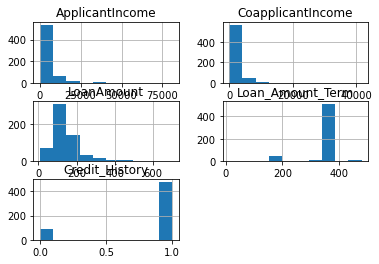

In [8]:
train_df.hist()

In [9]:
#encoding categorial variables
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [10]:
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y,random_state=42) 
#stratify-keeps the same proportion of instances in each split


In [12]:
#simple imputer is an ML class used to handle missing data in the predictive model
from sklearn.impute import SimpleImputer
imp=SimpleImputer()
imp_train=imp.fit(X_train)
X_train=imp_train.transform(X_train)
X_test_imp=imp_train.transform(X_test)
print(X_test_imp)
print(X_train)

[[2.4250e+03 2.3400e+03 1.4300e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.9950e+03 0.0000e+00 6.0000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.1757e+04 0.0000e+00 1.8700e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [5.9410e+03 4.2320e+03 2.9600e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [4.2830e+03 2.3830e+03 1.2700e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.5380e+03 1.4250e+03 3.0000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]]
[[1.907e+03 2.365e+03 1.200e+02 ... 0.000e+00 0.000e+00 1.000e+00]
 [3.497e+03 1.964e+03 1.160e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.775e+03 0.000e+00 1.100e+02 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [3.276e+03 4.840e+02 1.350e+02 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.917e+03 0.000e+00 8.400e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [4.333e+03 1.811e+03 1.600e+02 ... 0.000e+00 0.000e+00 1.000e+00]]


In [13]:
# Feature scaling not required for decision trees

In [43]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42,criterion='gini')
tree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [15]:
y_pred=tree.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
acc=accuracy_score(y_train,y_pred)
print(acc)

1.0


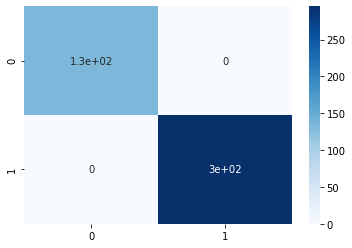

In [17]:
import seaborn as sns
cf_matrix=confusion_matrix(y_train, y_pred)
cm=sns.heatmap(cf_matrix,annot=True,cmap='Blues')


In [18]:
report=classification_report(y_train,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       295

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



In [19]:
from sklearn.model_selection import cross_val_score
print("Validation Mean F1 Score: ",cross_val_score(tree,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.693935949056838
Validation Mean Accuracy:  0.7552120383036935


In [20]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0


<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

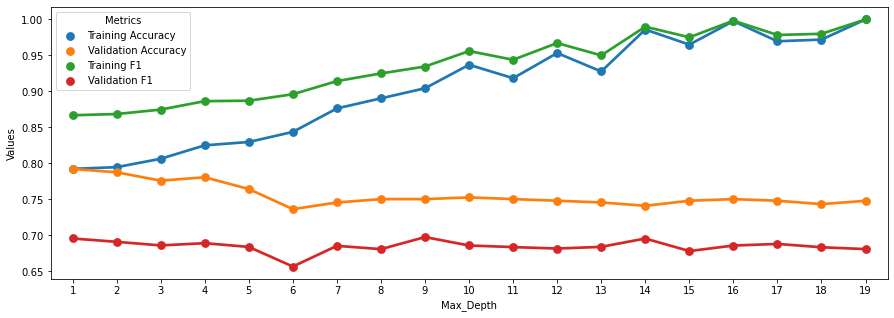

In [21]:
# since training scores are greater than the validation scores , the model is overfitting so prune the data by setting a hyperparameter called max_depth
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [22]:
conda install python-graphviz


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


[Text(153.45000000000002, 190.26, 'X[4] <= 0.429\ngini = 0.43\nsamples = 429\nvalue = [134, 295]'),
 Text(83.7, 135.9, 'X[2] <= 488.0\ngini = 0.165\nsamples = 55\nvalue = [50, 5]'),
 Text(55.800000000000004, 81.53999999999999, 'X[126] <= 0.5\ngini = 0.137\nsamples = 54\nvalue = [50, 4]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.107\nsamples = 53\nvalue = [50, 3]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 135.9, 'X[2] <= 87.5\ngini = 0.348\nsamples = 374\nvalue = [84, 290]'),
 Text(167.4, 81.53999999999999, 'X[623] <= 0.5\ngini = 0.456\nsamples = 57\nvalue = [20, 37]'),
 Text(139.5, 27.180000000000007, 'gini = 0.408\nsamples = 49\nvalue = [14, 35]'),
 Text(195.3, 27.180000000000007, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(279.0, 81.53999999999999, 'X[2] <= 148.62\ngini = 0.322\nsamples = 317\nvalue = [64, 253]'

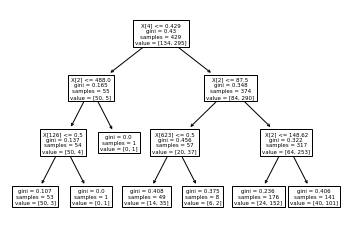

In [23]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
tree.plot_tree(tree_clf)

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

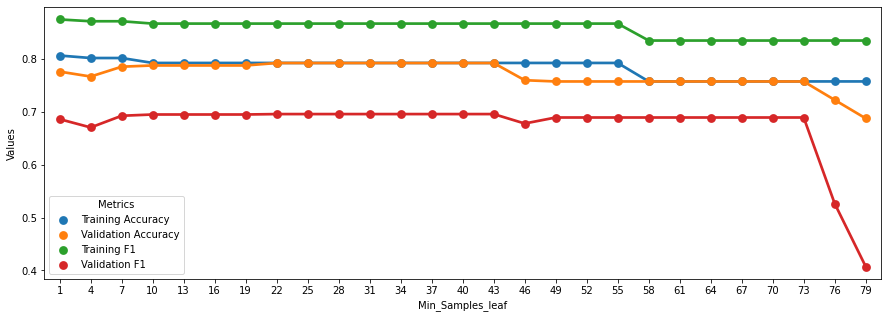

In [24]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)
    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [25]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Test Accuracy:  0.8486486486486486
Test F1 Score:  0.8992805755395684
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,32,26,58
1,2,125,127
All,34,151,185


In [26]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100 , max_depth=3,min_samples_leaf=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10)

In [27]:
y_pred_rc = classifier.predict(X_train)


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rc = confusion_matrix(y_train, y_pred_rc)
print(cm_rc)
accuracy_score(y_train, y_pred_rc)

[[  0 134]
 [  0 295]]


0.6876456876456877

In [29]:
print("Train F1 Score ", f1_score(y_train,y_pred_rc))
print("Train Accuracy ", accuracy_score(y_train,y_pred_rc))

print("Validation Mean F1 Score: ",cross_val_score(classifier,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(classifier,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8149171270718232
Train Accuracy  0.6876456876456877
Validation Mean F1 Score:  0.40746168582375486
Validation Mean Accuracy:  0.6876607387140903


In [32]:
y_pred_rc = classifier.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred_rc))
print("Test F1 Score: ",f1_score(y_test,y_pred_rc))
print("Confusion Matrix on Test Data")
cm_reg=pd.crosstab(y_test, y_pred_rc, rownames=['True'], colnames=['Predicted'], margins=True)        

Test Accuracy:  0.6864864864864865
Test F1 Score:  0.814102564102564
Confusion Matrix on Test Data


<AxesSubplot:xlabel='Predicted', ylabel='True'>

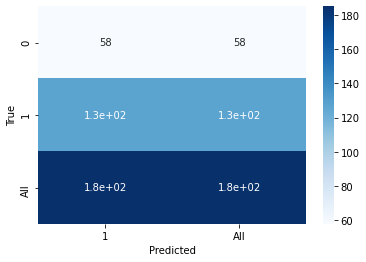

In [35]:
cf_reg=sns.heatmap(cm_reg,annot=True,cmap='Blues')
cf_reg

In [37]:
report_reg=classification_report(y_test,y_pred_rc)
print(report_reg)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.69      1.00      0.81       127

    accuracy                           0.69       185
   macro avg       0.34      0.50      0.41       185
weighted avg       0.47      0.69      0.56       185



C:\Users\91948\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91948\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91948\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [50]:
pred=log.predict(X_train)

In [51]:
acc_log=accuracy_score(y_train,pred)
print(acc_log)

0.7902097902097902


In [53]:
report_log=classification_report(y_train,pred)
print(report_log)

              precision    recall  f1-score   support

           0       0.85      0.40      0.54       134
           1       0.78      0.97      0.86       295

    accuracy                           0.79       429
   macro avg       0.82      0.68      0.70       429
weighted avg       0.80      0.79      0.76       429



[[ 53  81]
 [  9 286]]
AxesSubplot(0.125,0.125;0.62x0.755)


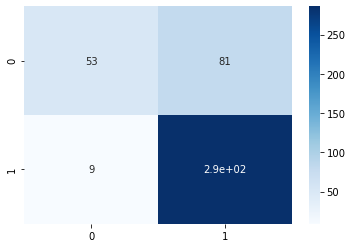

In [54]:
cf_log=confusion_matrix(y_train,pred)
cm_log=sns.heatmap(cf_log,annot=True,cmap="Blues")
print(cf_log)
print(cm_log)